##1. Tải bộ dữ liệu

In [5]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 33.9MB/s]


##2. Import thư viện cần thiết

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##3. Đọc bộ dữ liệu

In [7]:
dataset_path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


##4. Chia biến X,y

In [8]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
X.shape, y.shape

((891, 8), (891,))

##5. Thêm bias vào X

In [9]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

##6. Chia tập train, val, test

In [10]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(623, 9) (623,)
(179, 9) (179,)
(89, 9) (89,)


##7. Chuẩn hóa dữ liệu

In [11]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

##8. Cài đặt các hàm quan trọng

In [12]:
# Hàm sigmoid:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm dự đoán:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

# Hàm tính loss:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (
        -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    ).mean()

# Hàm tính gradient:
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

# Hàm cập nhật trọng số:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# Hàm tính độ chính xác:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

##9. Khai báo các siêu tham số và khởi tạo weights

In [13]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

##10. Huấn luyện mô hình

In [14]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.590

EPOCH 2:	Training loss: 0.670	Validation loss: 0.574

EPOCH 3:	Training loss: 0.640	Validation loss: 0.560

EPOCH 4:	Training loss: 0.614	Validation loss: 0.549

EPOCH 5:	Training loss: 0.592	Validation loss: 0.539

EPOCH 6:	Training loss: 0.572	Validation loss: 0.531

EPOCH 7:	Training loss: 0.554	Validation loss: 0.524

EPOCH 8:	Training loss: 0.539	Validation loss: 0.519

EPOCH 9:	Training loss: 0.526	Validation loss: 0.514

EPOCH 10:	Training loss: 0.514	Validation loss: 0.511

EPOCH 11:	Training loss: 0.504	Validation loss: 0.508

EPOCH 12:	Training loss: 0.495	Validation loss: 0.506

EPOCH 13:	Training loss: 0.487	Validation loss: 0.504

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

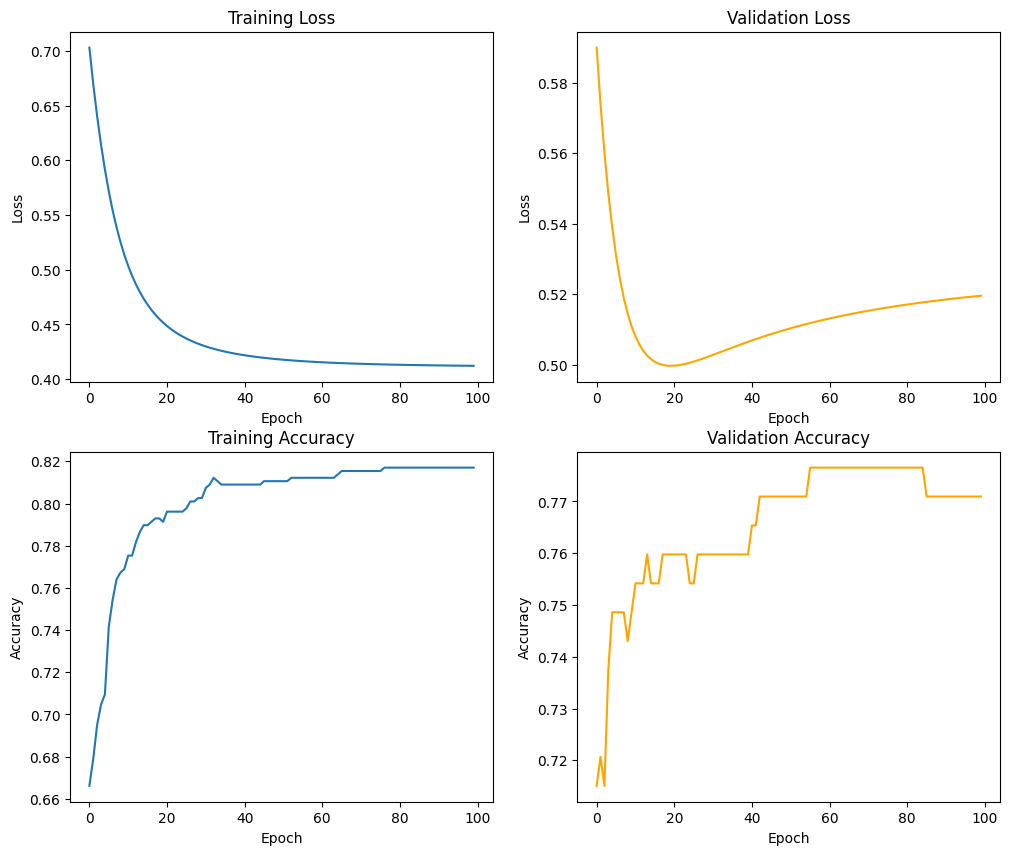

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

##11. Đánh giá mô hình

In [16]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Accuracy (Validation): {val_set_acc}')
print(f'Accuracy (Test): {test_set_acc}')

Evaluation on validation and test set:
Accuracy (Validation): 0.770949720670391
Accuracy (Test): 0.7752808988764045
